### HABUMUGISHA Emmanuel

#### 225229109

In [10]:
import pandas as pd
import numpy as np

In [11]:
# step 1

In [12]:
df= pd.read_csv('emm.csv', encoding='latin1')

In [13]:
df.head()

,category,quotes,labels
0,demotivation,Try & try until you cannot succeed.,0
1,demotivation,Trying is the first step toward failure.,0
2,demotivation,He who laughs last didn't get the joke.,0
3,demotivation,The reward for good work is more work.,0
4,demotivation,I love mankind; it's people I can't stand!,0


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   category   20 non-null     object
 1   quotes     20 non-null     object
 2   labels     20 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 608.0+ bytes


In [15]:
df.shape

(20, 3)

In [19]:
df['labels'].value_counts()

0    10
1    10
Name: labels, dtype: int64

In [20]:
# Step 2 Preprocessing

In [21]:
import nltk
nltk.download('punkt')

[nltk_data] Error loading punkt: <urlopen error [Errno 11001]
[nltk_data]     getaddrinfo failed>


False

In [22]:
nltk.download('stopwords')

[nltk_data] Error loading stopwords: <urlopen error [Errno 11001]
[nltk_data]     getaddrinfo failed>


False

In [23]:
from nltk.corpus import stopwords
stop_words = stopwords.words("english")

In [24]:
import regex as re

In [25]:
#stop words removal

In [27]:
df['quotes'] = df['quotes'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop_words)]))

In [28]:
df.head()

,category,quotes,labels
0,demotivation,Try & try cannot succeed.,0
1,demotivation,Trying first step toward failure.,0
2,demotivation,He laughs last get joke.,0
3,demotivation,The reward good work work.,0
4,demotivation,I love mankind; people I can't stand!,0


In [29]:
import string
df['quotes']=df['quotes'].str.replace('[{}]'.format(string.punctuation), '')

C:\Users\ISHIMWE K AHMED\AppData\Local\Temp\ipykernel_9176\4178206066.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  df['quotes']=df['quotes'].str.replace('[{}]'.format(string.punctuation), '')


In [30]:
df.head()

,category,quotes,labels
0,demotivation,Try try cannot succeed,0
1,demotivation,Trying first step toward failure,0
2,demotivation,He laughs last get joke,0
3,demotivation,The reward good work work,0
4,demotivation,I love mankind people I cant stand,0


In [31]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [33]:
v = TfidfVectorizer()
x = v.fit_transform(df['quotes']).toarray()
x = x.astype(float)

In [34]:
x.dtype

dtype('float64')

In [35]:
x.shape

(20, 89)

In [36]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam

In [37]:
y = df['labels']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=42)

In [40]:
model = Sequential()
model.add(Dense(32, input_dim=89, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# Compile the model
model.compile(loss='binary_crossentropy', optimizer=Adam(learning_rate=0.001), metrics=['accuracy'])

In [41]:
model.fit(x_train, y_train, validation_split=0.2, epochs=100, batch_size=10, verbose=1)

Epoch 1/100
2/2 [==============================] - 1s 265ms/step - loss: 0.6764 - accuracy: 0.8333 - val_loss: 0.7173 - val_accuracy: 0.0000e+00
Epoch 2/100
2/2 [==============================] - 0s 62ms/step - loss: 0.6704 - accuracy: 0.8333 - val_loss: 0.7176 - val_accuracy: 0.0000e+00
Epoch 3/100
2/2 [==============================] - 0s 62ms/step - loss: 0.6656 - accuracy: 0.8333 - val_loss: 0.7177 - val_accuracy: 0.0000e+00
Epoch 4/100
2/2 [==============================] - 0s 47ms/step - loss: 0.6609 - accuracy: 0.8333 - val_loss: 0.7178 - val_accuracy: 0.0000e+00
Epoch 5/100
2/2 [==============================] - 0s 47ms/step - loss: 0.6566 - accuracy: 0.8333 - val_loss: 0.7178 - val_accuracy: 0.0000e+00
Epoch 6/100
2/2 [==============================] - 0s 47ms/step - loss: 0.6521 - accuracy: 0.8333 - val_loss: 0.7178 - val_accuracy: 0.0000e+00
Epoch 7/100
2/2 [==============================] - 0s 47ms/step - loss: 0.6478 - accuracy: 0.8333 - val_loss: 0.7180 - val_accuracy: 0.

In [42]:
#accuracy plot

In [43]:
import matplotlib.pyplot as plt

In [44]:
def accuracy_plotting(model):
  plt.plot(model.history['accuracy'])
  plt.plot(model.history['val_accuracy'])
  plt.title('Model Accuracy')
  plt.ylabel('accuracy')
  plt.xlabel('epoch')
  plt.legend(['Train', 'Validation'])
  plt.show()

In [45]:
#loss plotting

In [46]:
def Loss_plotting(model):
  plt.plot(model.history['loss'])
  plt.plot(model.history['val_loss'])
  plt.title('Model Loss')
  plt.ylabel('loss')
  plt.xlabel('epoch')
  plt.legend(['Train', 'Validation'])
  plt.show()

## Model improvement 1

In [50]:
def model_improvement1(nodes):
  model = Sequential()
  model.add(Dense(nodes, input_dim=89, activation='relu'))
  model.add(Dense(1, activation='sigmoid'))
  # Compile the model
  model.compile(loss='binary_crossentropy', optimizer=Adam(learning_rate=0.001), metrics=['accuracy'])
  return model

In [51]:
model1 = model_improvement1(8)

In [52]:
history1 = model1.fit(x_train, y_train, validation_split=0.2, epochs=100, batch_size=10, verbose=1)

Epoch 1/100
2/2 [==============================] - 1s 141ms/step - loss: 0.7081 - accuracy: 0.4167 - val_loss: 0.7436 - val_accuracy: 0.3333
Epoch 2/100
2/2 [==============================] - 0s 47ms/step - loss: 0.7044 - accuracy: 0.5000 - val_loss: 0.7427 - val_accuracy: 0.3333
Epoch 3/100
2/2 [==============================] - 0s 47ms/step - loss: 0.7012 - accuracy: 0.5000 - val_loss: 0.7424 - val_accuracy: 0.3333
Epoch 4/100
2/2 [==============================] - 0s 47ms/step - loss: 0.6981 - accuracy: 0.5000 - val_loss: 0.7423 - val_accuracy: 0.3333
Epoch 5/100
2/2 [==============================] - 0s 31ms/step - loss: 0.6954 - accuracy: 0.5000 - val_loss: 0.7425 - val_accuracy: 0.3333
Epoch 6/100
2/2 [==============================] - 0s 47ms/step - loss: 0.6926 - accuracy: 0.5000 - val_loss: 0.7429 - val_accuracy: 0.3333
Epoch 7/100
2/2 [==============================] - 0s 47ms/step - loss: 0.6902 - accuracy: 0.5000 - val_loss: 0.7433 - val_accuracy: 0.3333
Epoch 8/100
2/2 [==

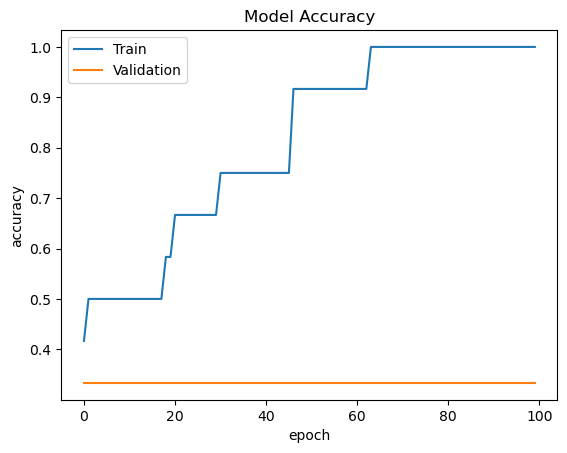

In [53]:
accuracy_plotting(history1)

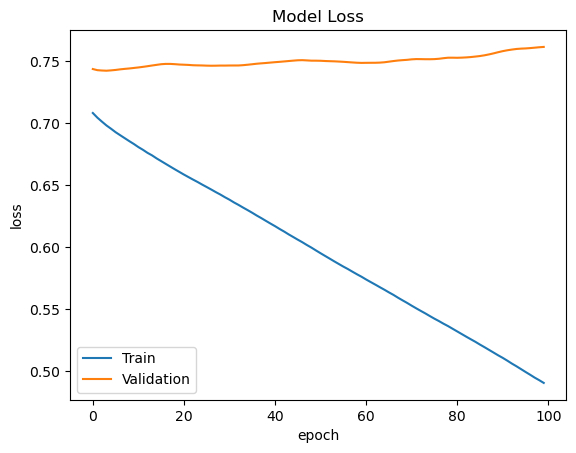

In [54]:
Loss_plotting(history1)

In [55]:
model2 = model_improvement1(6)

In [56]:
history2 = model2.fit(x_train, y_train, validation_split=0.2, epochs=100, batch_size=10, verbose=1)

Epoch 1/100
2/2 [==============================] - 1s 172ms/step - loss: 0.7140 - accuracy: 0.2500 - val_loss: 0.7258 - val_accuracy: 0.3333
Epoch 2/100
2/2 [==============================] - 0s 47ms/step - loss: 0.7101 - accuracy: 0.2500 - val_loss: 0.7245 - val_accuracy: 0.3333
Epoch 3/100
2/2 [==============================] - 0s 31ms/step - loss: 0.7069 - accuracy: 0.3333 - val_loss: 0.7230 - val_accuracy: 0.3333
Epoch 4/100
2/2 [==============================] - 0s 47ms/step - loss: 0.7042 - accuracy: 0.4167 - val_loss: 0.7219 - val_accuracy: 0.3333
Epoch 5/100
2/2 [==============================] - 0s 47ms/step - loss: 0.7012 - accuracy: 0.4167 - val_loss: 0.7211 - val_accuracy: 0.3333
Epoch 6/100
2/2 [==============================] - 0s 62ms/step - loss: 0.6987 - accuracy: 0.4167 - val_loss: 0.7202 - val_accuracy: 0.6667
Epoch 7/100
2/2 [==============================] - 0s 62ms/step - loss: 0.6960 - accuracy: 0.4167 - val_loss: 0.7193 - val_accuracy: 0.6667
Epoch 8/100
2/2 [==

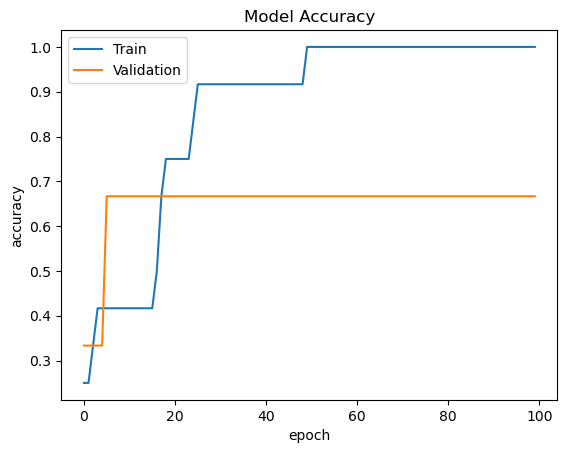

In [57]:
accuracy_plotting(history2)

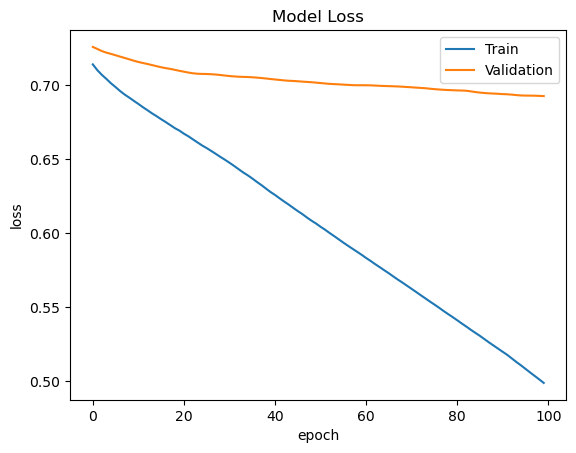

In [58]:
Loss_plotting(history2)

In [59]:
model3 = model_improvement1(32)

In [60]:
history3 = model3.fit(x_train, y_train, validation_split=0.2, epochs=100, batch_size=10, verbose=1)

Epoch 1/100
2/2 [==============================] - 1s 187ms/step - loss: 0.6837 - accuracy: 0.5000 - val_loss: 0.6763 - val_accuracy: 0.3333
Epoch 2/100
2/2 [==============================] - 0s 62ms/step - loss: 0.6768 - accuracy: 0.5833 - val_loss: 0.6758 - val_accuracy: 0.3333
Epoch 3/100
2/2 [==============================] - 0s 31ms/step - loss: 0.6709 - accuracy: 0.5833 - val_loss: 0.6752 - val_accuracy: 0.3333
Epoch 4/100
2/2 [==============================] - 0s 47ms/step - loss: 0.6654 - accuracy: 0.6667 - val_loss: 0.6748 - val_accuracy: 0.3333
Epoch 5/100
2/2 [==============================] - 0s 47ms/step - loss: 0.6602 - accuracy: 0.6667 - val_loss: 0.6745 - val_accuracy: 0.3333
Epoch 6/100
2/2 [==============================] - 0s 47ms/step - loss: 0.6549 - accuracy: 0.6667 - val_loss: 0.6744 - val_accuracy: 0.3333
Epoch 7/100
2/2 [==============================] - 0s 78ms/step - loss: 0.6500 - accuracy: 0.7500 - val_loss: 0.6744 - val_accuracy: 0.3333
Epoch 8/100
2/2 [==

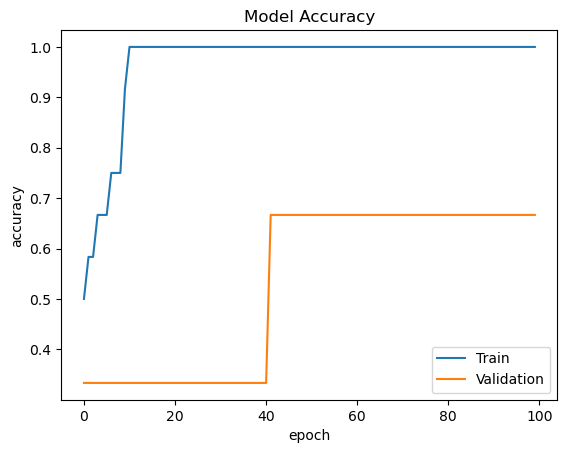

In [61]:
accuracy_plotting(history3)

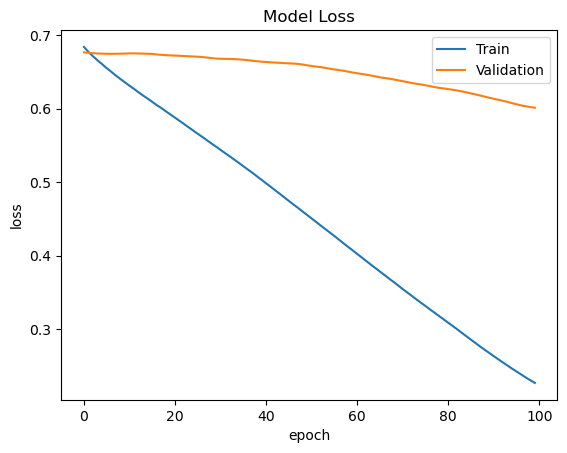

In [62]:
Loss_plotting(history3)

In [63]:
model4 = model_improvement1(64)

In [64]:
history4 = model4.fit(x_train, y_train, validation_split=0.2, epochs=100, batch_size=10, verbose=1)

Epoch 1/100
2/2 [==============================] - 1s 156ms/step - loss: 0.6962 - accuracy: 0.3333 - val_loss: 0.6961 - val_accuracy: 0.6667
Epoch 2/100
2/2 [==============================] - 0s 62ms/step - loss: 0.6869 - accuracy: 0.3333 - val_loss: 0.6949 - val_accuracy: 0.6667
Epoch 3/100
2/2 [==============================] - 0s 47ms/step - loss: 0.6785 - accuracy: 0.5000 - val_loss: 0.6944 - val_accuracy: 0.6667
Epoch 4/100
2/2 [==============================] - 0s 78ms/step - loss: 0.6712 - accuracy: 0.5833 - val_loss: 0.6938 - val_accuracy: 0.6667
Epoch 5/100
2/2 [==============================] - 0s 62ms/step - loss: 0.6640 - accuracy: 0.8333 - val_loss: 0.6931 - val_accuracy: 0.6667
Epoch 6/100
2/2 [==============================] - 0s 78ms/step - loss: 0.6574 - accuracy: 0.8333 - val_loss: 0.6922 - val_accuracy: 0.6667
Epoch 7/100
2/2 [==============================] - 0s 62ms/step - loss: 0.6510 - accuracy: 0.8333 - val_loss: 0.6912 - val_accuracy: 0.6667
Epoch 8/100
2/2 [==

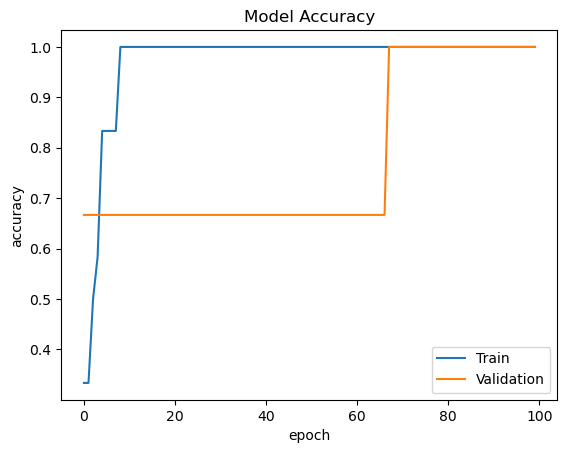

In [65]:
accuracy_plotting(history4)

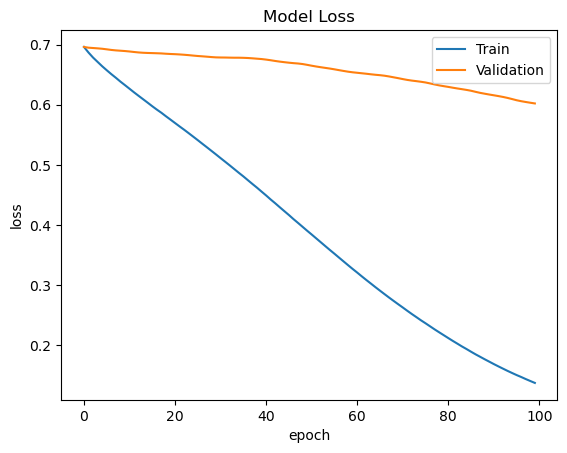

In [66]:
Loss_plotting(history4)

In [67]:
model5 = model_improvement1(128)
history5 = model5.fit(x_train, y_train, validation_split=0.2, epochs=100, batch_size=10, verbose=1)

Epoch 1/100
2/2 [==============================] - 1s 297ms/step - loss: 0.6985 - accuracy: 0.5000 - val_loss: 0.7327 - val_accuracy: 0.6667
Epoch 2/100
2/2 [==============================] - 0s 47ms/step - loss: 0.6841 - accuracy: 0.6667 - val_loss: 0.7312 - val_accuracy: 0.6667
Epoch 3/100
2/2 [==============================] - 0s 62ms/step - loss: 0.6715 - accuracy: 0.6667 - val_loss: 0.7294 - val_accuracy: 0.6667
Epoch 4/100
2/2 [==============================] - 0s 62ms/step - loss: 0.6603 - accuracy: 0.7500 - val_loss: 0.7276 - val_accuracy: 0.6667
Epoch 5/100
2/2 [==============================] - 0s 47ms/step - loss: 0.6504 - accuracy: 0.7500 - val_loss: 0.7258 - val_accuracy: 0.6667
Epoch 6/100
2/2 [==============================] - 0s 62ms/step - loss: 0.6411 - accuracy: 0.8333 - val_loss: 0.7245 - val_accuracy: 0.6667
Epoch 7/100
2/2 [==============================] - 0s 78ms/step - loss: 0.6317 - accuracy: 0.8333 - val_loss: 0.7232 - val_accuracy: 0.6667
Epoch 8/100
2/2 [==

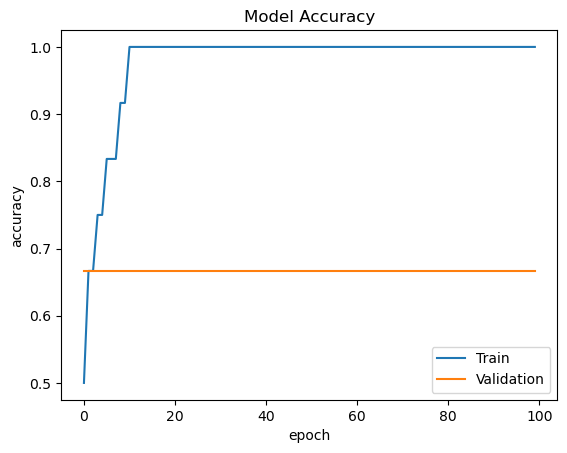

In [68]:
accuracy_plotting(history5)

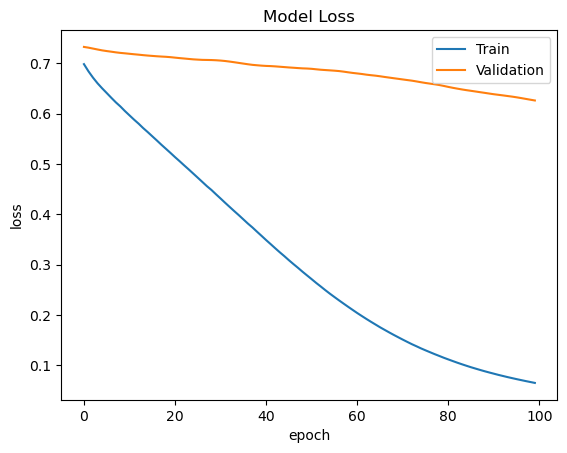

In [69]:
Loss_plotting(history5)

In [70]:
model6 = model_improvement1(256)
history6 = model6.fit(x_train, y_train, validation_split=0.2, epochs=100, batch_size=10, verbose=1)

Epoch 1/100
2/2 [==============================] - 1s 172ms/step - loss: 0.6878 - accuracy: 0.5833 - val_loss: 0.7060 - val_accuracy: 0.3333
Epoch 2/100
2/2 [==============================] - 0s 63ms/step - loss: 0.6696 - accuracy: 0.7500 - val_loss: 0.7047 - val_accuracy: 0.3333
Epoch 3/100
2/2 [==============================] - 0s 47ms/step - loss: 0.6538 - accuracy: 0.9167 - val_loss: 0.7021 - val_accuracy: 0.3333
Epoch 4/100
2/2 [==============================] - 0s 31ms/step - loss: 0.6402 - accuracy: 1.0000 - val_loss: 0.6991 - val_accuracy: 0.6667
Epoch 5/100
2/2 [==============================] - 0s 47ms/step - loss: 0.6279 - accuracy: 1.0000 - val_loss: 0.6962 - val_accuracy: 0.6667
Epoch 6/100
2/2 [==============================] - 0s 62ms/step - loss: 0.6156 - accuracy: 1.0000 - val_loss: 0.6935 - val_accuracy: 0.6667
Epoch 7/100
2/2 [==============================] - 0s 47ms/step - loss: 0.6049 - accuracy: 1.0000 - val_loss: 0.6911 - val_accuracy: 0.6667
Epoch 8/100
2/2 [==

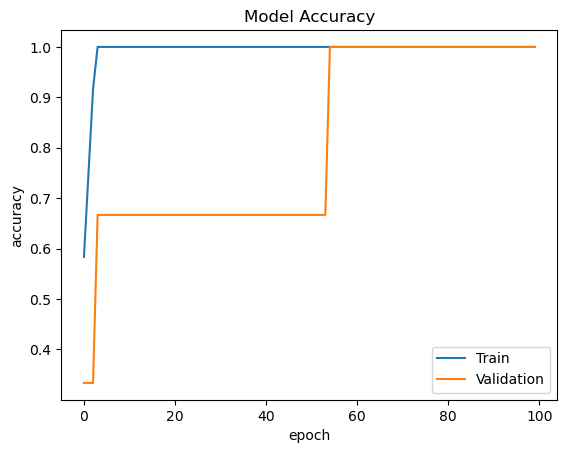

In [71]:
accuracy_plotting(history6)

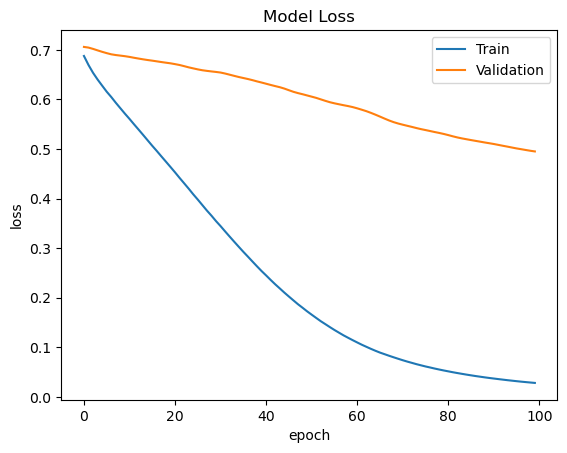

In [72]:
Loss_plotting(history6)

In [73]:
model7 = model_improvement1(512)
history7 = model7.fit(x_train, y_train, validation_split=0.2, epochs=100, batch_size=10, verbose=1)

Epoch 1/100
2/2 [==============================] - 1s 172ms/step - loss: 0.6940 - accuracy: 0.6667 - val_loss: 0.6885 - val_accuracy: 0.6667
Epoch 2/100
2/2 [==============================] - 0s 79ms/step - loss: 0.6674 - accuracy: 0.9167 - val_loss: 0.6866 - val_accuracy: 0.6667
Epoch 3/100
2/2 [==============================] - 0s 47ms/step - loss: 0.6446 - accuracy: 1.0000 - val_loss: 0.6828 - val_accuracy: 0.6667
Epoch 4/100
2/2 [==============================] - 0s 47ms/step - loss: 0.6250 - accuracy: 1.0000 - val_loss: 0.6790 - val_accuracy: 0.6667
Epoch 5/100
2/2 [==============================] - 0s 63ms/step - loss: 0.6066 - accuracy: 1.0000 - val_loss: 0.6760 - val_accuracy: 0.6667
Epoch 6/100
2/2 [==============================] - 0s 62ms/step - loss: 0.5889 - accuracy: 1.0000 - val_loss: 0.6740 - val_accuracy: 0.6667
Epoch 7/100
2/2 [==============================] - 0s 62ms/step - loss: 0.5710 - accuracy: 1.0000 - val_loss: 0.6730 - val_accuracy: 1.0000
Epoch 8/100
2/2 [==

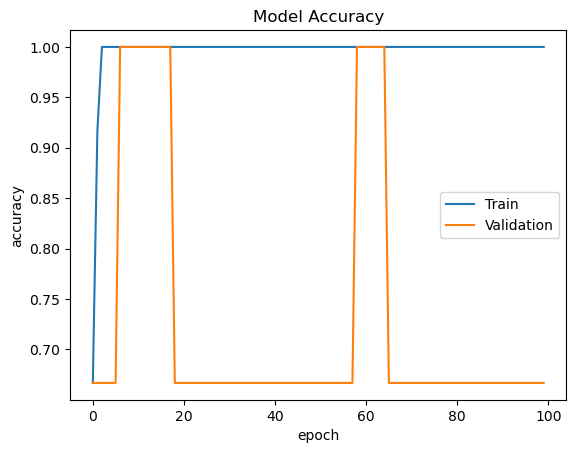

In [74]:
accuracy_plotting(history7)

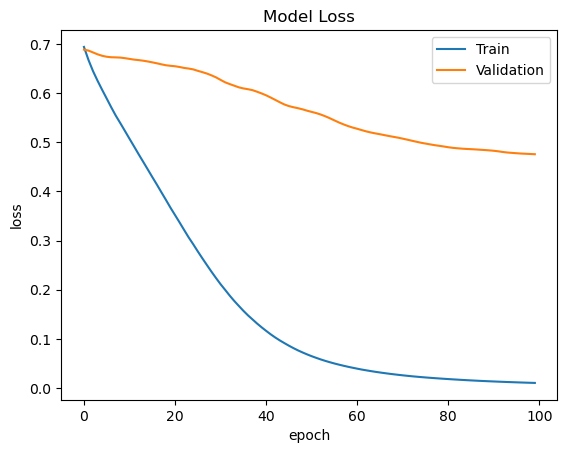

In [75]:
Loss_plotting(history7)

## Model Improvement 2

In [78]:
#2 layers with 32 nodes
model = Sequential()
model.add(Dense(32, input_dim=89, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# Compile the model
model.compile(loss='binary_crossentropy', optimizer=Adam(learning_rate=0.001), metrics=['accuracy'])

In [79]:
hist1 = model.fit(x_train, y_train, validation_split=0.2, epochs=100, batch_size=10, verbose=1)

Epoch 1/100
2/2 [==============================] - 1s 187ms/step - loss: 0.7035 - accuracy: 0.3333 - val_loss: 0.6845 - val_accuracy: 0.6667
Epoch 2/100
2/2 [==============================] - 0s 78ms/step - loss: 0.6967 - accuracy: 0.4167 - val_loss: 0.6835 - val_accuracy: 0.6667
Epoch 3/100
2/2 [==============================] - 0s 47ms/step - loss: 0.6910 - accuracy: 0.4167 - val_loss: 0.6824 - val_accuracy: 0.6667
Epoch 4/100
2/2 [==============================] - 0s 62ms/step - loss: 0.6858 - accuracy: 0.4167 - val_loss: 0.6816 - val_accuracy: 0.6667
Epoch 5/100
2/2 [==============================] - 0s 62ms/step - loss: 0.6809 - accuracy: 0.4167 - val_loss: 0.6804 - val_accuracy: 0.6667
Epoch 6/100
2/2 [==============================] - 0s 62ms/step - loss: 0.6762 - accuracy: 0.5833 - val_loss: 0.6791 - val_accuracy: 0.6667
Epoch 7/100
2/2 [==============================] - 0s 47ms/step - loss: 0.6722 - accuracy: 0.7500 - val_loss: 0.6782 - val_accuracy: 0.6667
Epoch 8/100
2/2 [==

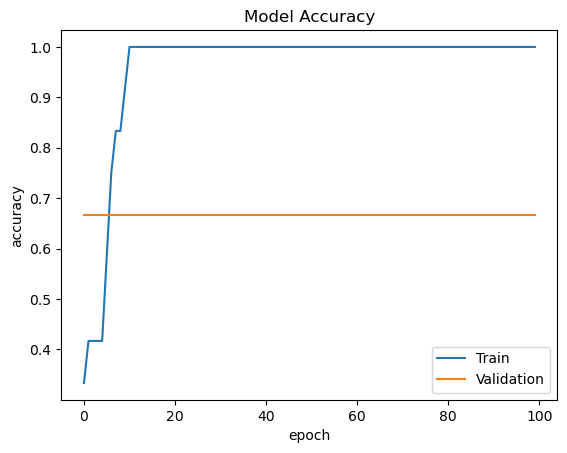

In [80]:
accuracy_plotting(hist1)

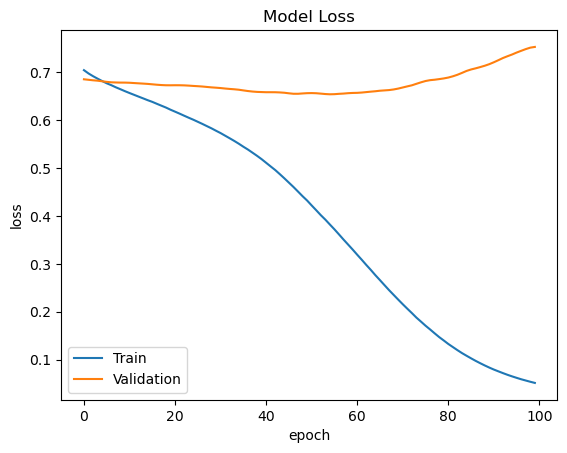

In [81]:
Loss_plotting(hist1)

In [84]:
#3 layers with 32 nodes
model = Sequential()
model.add(Dense(32, input_dim=89, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# Compile the model
model.compile(loss='binary_crossentropy', optimizer=Adam(learning_rate=0.001), metrics=['accuracy'])

In [85]:
hist2 = model.fit(x_train, y_train, validation_split=0.2, epochs=100, batch_size=10, verbose=1)

Epoch 1/100
2/2 [==============================] - 1s 156ms/step - loss: 0.6942 - accuracy: 0.4167 - val_loss: 0.6998 - val_accuracy: 0.3333
Epoch 2/100
2/2 [==============================] - 0s 47ms/step - loss: 0.6867 - accuracy: 0.5833 - val_loss: 0.6996 - val_accuracy: 0.3333
Epoch 3/100
2/2 [==============================] - 0s 47ms/step - loss: 0.6821 - accuracy: 0.6667 - val_loss: 0.6994 - val_accuracy: 0.3333
Epoch 4/100
2/2 [==============================] - 0s 78ms/step - loss: 0.6773 - accuracy: 0.7500 - val_loss: 0.6995 - val_accuracy: 0.3333
Epoch 5/100
2/2 [==============================] - 0s 78ms/step - loss: 0.6726 - accuracy: 0.8333 - val_loss: 0.6998 - val_accuracy: 0.3333
Epoch 6/100
2/2 [==============================] - 0s 62ms/step - loss: 0.6676 - accuracy: 0.8333 - val_loss: 0.7007 - val_accuracy: 0.3333
Epoch 7/100
2/2 [==============================] - 0s 47ms/step - loss: 0.6635 - accuracy: 1.0000 - val_loss: 0.7015 - val_accuracy: 0.3333
Epoch 8/100
2/2 [==

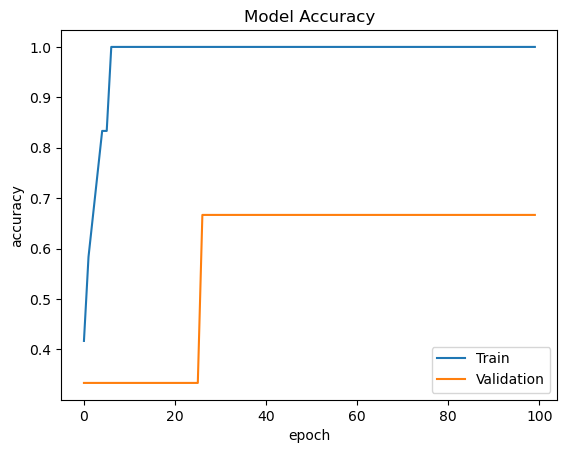

In [86]:
accuracy_plotting(hist2)

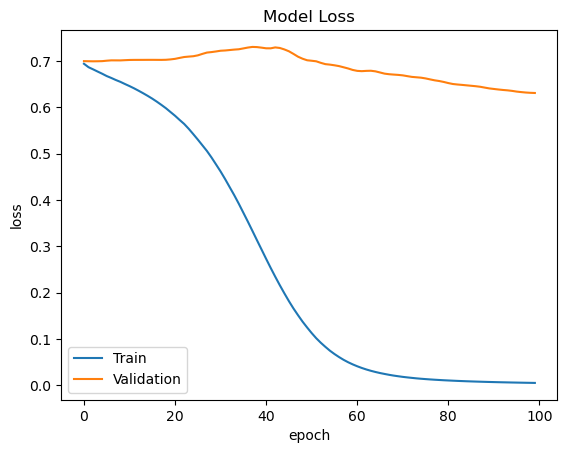

In [87]:
Loss_plotting(hist2)

In [90]:
# 4 layers with 32 nodes
model = Sequential()
model.add(Dense(32, input_dim=89, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# Compile the model
model.compile(loss='binary_crossentropy', optimizer=Adam(learning_rate=0.001), metrics=['accuracy'])

In [91]:
hist3 = model.fit(x_train, y_train, validation_split=0.2, epochs=100, batch_size=10, verbose=1)

Epoch 1/100
2/2 [==============================] - 1s 174ms/step - loss: 0.6918 - accuracy: 0.4167 - val_loss: 0.7064 - val_accuracy: 0.6667
Epoch 2/100
2/2 [==============================] - 0s 63ms/step - loss: 0.6854 - accuracy: 0.6667 - val_loss: 0.7064 - val_accuracy: 0.3333
Epoch 3/100
2/2 [==============================] - 0s 62ms/step - loss: 0.6811 - accuracy: 0.6667 - val_loss: 0.7071 - val_accuracy: 0.3333
Epoch 4/100
2/2 [==============================] - 0s 78ms/step - loss: 0.6776 - accuracy: 0.7500 - val_loss: 0.7081 - val_accuracy: 0.3333
Epoch 5/100
2/2 [==============================] - 0s 62ms/step - loss: 0.6738 - accuracy: 0.6667 - val_loss: 0.7086 - val_accuracy: 0.3333
Epoch 6/100
2/2 [==============================] - 0s 47ms/step - loss: 0.6702 - accuracy: 0.6667 - val_loss: 0.7091 - val_accuracy: 0.3333
Epoch 7/100
2/2 [==============================] - 0s 62ms/step - loss: 0.6673 - accuracy: 0.6667 - val_loss: 0.7097 - val_accuracy: 0.3333
Epoch 8/100
2/2 [==

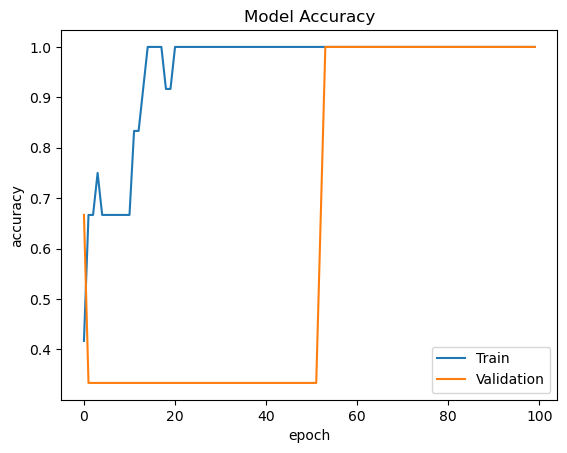

In [92]:
accuracy_plotting(hist3)

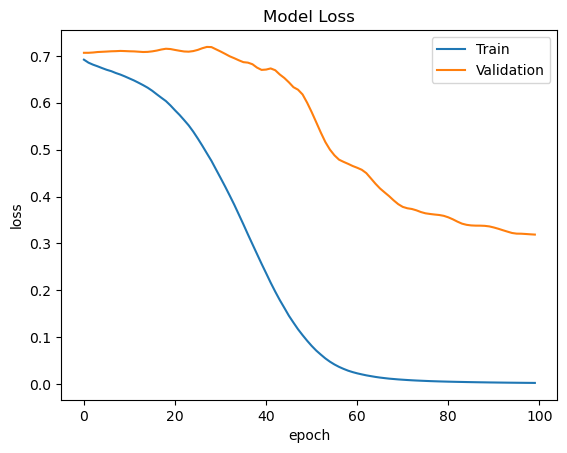

In [93]:
Loss_plotting(hist3)

In [96]:
# 5 layers with 32 nodes
model = Sequential()
model.add(Dense(32, input_dim=89, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# Compile the model
model.compile(loss='binary_crossentropy', optimizer=Adam(learning_rate=0.001), metrics=['accuracy'])

In [97]:
hist4 = model.fit(x_train, y_train, validation_split=0.2, epochs=100, batch_size=10, verbose=1)

Epoch 1/100
2/2 [==============================] - 1s 203ms/step - loss: 0.6914 - accuracy: 0.6667 - val_loss: 0.6946 - val_accuracy: 0.3333
Epoch 2/100
2/2 [==============================] - 0s 62ms/step - loss: 0.6886 - accuracy: 0.6667 - val_loss: 0.6943 - val_accuracy: 0.3333
Epoch 3/100
2/2 [==============================] - 0s 47ms/step - loss: 0.6864 - accuracy: 0.6667 - val_loss: 0.6949 - val_accuracy: 0.3333
Epoch 4/100
2/2 [==============================] - 0s 47ms/step - loss: 0.6843 - accuracy: 0.8333 - val_loss: 0.6957 - val_accuracy: 0.3333
Epoch 5/100
2/2 [==============================] - 0s 47ms/step - loss: 0.6822 - accuracy: 0.8333 - val_loss: 0.6964 - val_accuracy: 0.3333
Epoch 6/100
2/2 [==============================] - 0s 62ms/step - loss: 0.6799 - accuracy: 0.8333 - val_loss: 0.6969 - val_accuracy: 0.3333
Epoch 7/100
2/2 [==============================] - 0s 62ms/step - loss: 0.6776 - accuracy: 0.8333 - val_loss: 0.6974 - val_accuracy: 0.3333
Epoch 8/100
2/2 [==

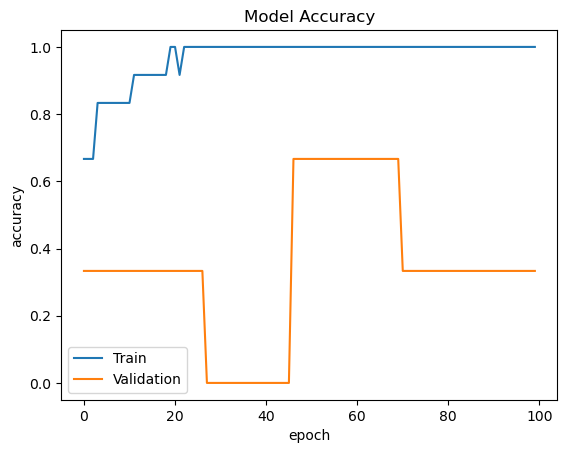

In [98]:
accuracy_plotting(hist4)

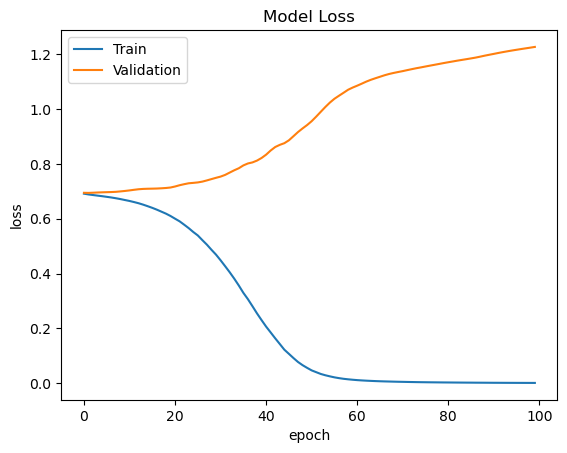

In [99]:
Loss_plotting(hist4)